# Introduction

This worksheet covers linear regression. Similar to the previous worksheet, you will do some work implementing your own versions of these algorithms, to ensure that you understand the details of them. You will also compare them with the implementations in scikit-learn to test your implementations.

# Preliminaries
Import key packages: NumPy, matplotlib, and any others that you prefer to work with. In general, when writing code, you will put all your import statements at the top. However, for these worksheets we will import as we go along.

In [1]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression
In linear regression we make the assumption that the data $(x_i, y_i)$ can be modelled by a function of the form
$$ \hat{y_i} = f(\vec{x}_i)= \sum_j a_j x_{ij}  + b_i$$

Recall that we can express this in a matrix format by:
$$ \hat{\vec{y}} = f(X)= X\Theta$$

where
$$ X=\begin{pmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,n} &1 \\
\vdots & \vdots & \ldots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,n} & 1
\end{pmatrix}, \quad \vec{y}=\begin{pmatrix} y_1 \\ \vdots \\y_N \end{pmatrix}, \quad \Theta=\begin{pmatrix} a_1 \\ \vdots \\a_n\\b \end{pmatrix}$$

We saw in lectures that the optimal value of $\Theta$ is given by setting
$$ \Theta = (X^T X)^{-1} X^T \vec{y}$$

The quantity $(X^T X)^{-1} X^T$ is called the psuedoinverse of X, and can be computed using the function `np.linalg.pinv`.

We will (a) perform a linear regression on the diabetes dataset. You can load this dataset using the function `load_diabetes` from `sklearn.datasets`. (b) compute the mean squared error and the R^2, and (c) compare your results with the built in function in sklearn (`sklearn.linear_model.LinearRegresion()`). You should get the same results.

In [2]:
# import statments here
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part (a) Implementing linear regression

In [3]:
# Load the diabetes dataset
##TODO##
diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target

# Split the dataset into training and test, using test_size=0.2
##TODO##
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# Add a column of ones to Xtrain and Xtest for the intercept term
##TODO##
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


In [5]:
# Calculate the value of the coefficients theta. You can use the function np.linalg.pinv
##TODO##
theta = np.linalg.pinv(X_train) @ y_train


## Part (b) Computing performance metrics

In [6]:
# Make a prediction on the test set by applying the coefficients theta to the test set
##TODO##
y_pred = X_test @ theta


In [7]:
# Calculate the mean squared error and the R^2.
# You can use the built in functions from sklearn
##TODO##
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)


MSE: 2900.1936284934764
R^2: 0.45260276297192037


## Part (c) Checking results
Compare your results with the built in function `sklearn.linear_model.LinearRegression()`

In [8]:
# Instantiate the linear regression
##TODO##
from sklearn.linear_model import LinearRegression

lr = LinearRegression()



In [9]:
# Fit the model and make a prediction on the test set. Compare with your implementation
##TODO##
lr.fit(X_train[:, 1:], y_train)
y_pred_sklearn = lr.predict(X_test[:, 1:])

print("Sklearn MSE:", mean_squared_error(y_test, y_pred_sklearn))
print("Sklearn R^2:", r2_score(y_test, y_pred_sklearn))



Sklearn MSE: 2900.1936284934804
Sklearn R^2: 0.4526027629719196


Visualise the perfomance of the regression by plotting your predicted values vs target values on a scatter plot, and drawing a line y=x. If all predictions were perfect, the predicted values would lie on the line.

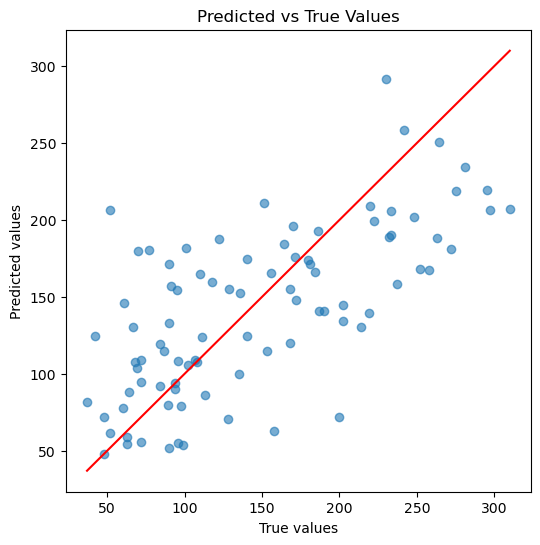

In [10]:
# Plot predicted values vs target values on a scatter plot, and drawing a line y=x
## TODO##
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Predicted vs True Values")
plt.show()


# (Optional) Polynomial regression
The term 'linear' in linear regression refers only to the coefficients $\theta$. We can in fact compute polynomial terms in the data and perform linear regression over this extended dataset to get a better fit to the data.

To compute polynomial terms in the data automatically, you can use the class `sklearn.preprocessing.PolynomialFeatures`. To find out how to use it, look at the guidance (you can type `help(PolynomialFeatures)` once you have imported it).

The following small dataset (in the cell below) gives a relationship between temperature and yield for an experiment. Use cross-validation to select the degree of the polynomial that best fits this data.

Plot the mean squared error against degree on the training set and on the validation set. Which degree of polynomial best fits this data?

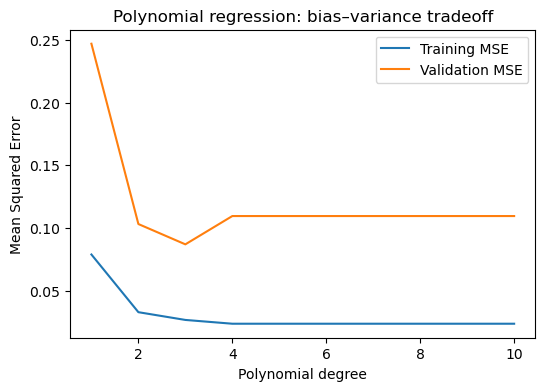

In [11]:
# Data
X = np.array([50,50,50,70,70,70,80,80,80,90,90,90,100,100,100]).reshape(-1, 1)
y = np.array([3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3,3.1,2.8,3.3,3.5,3]).reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

degrees = range(1, 11)
train_mse = []
val_mse = []

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_val, y_val_pred))

plt.figure(figsize=(6, 4))
plt.plot(degrees, train_mse, label="Training MSE")
plt.plot(degrees, val_mse, label="Validation MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Polynomial regression: bias–variance tradeoff")
plt.show()
